# Initial budget

In [1]:
budget = 300000

# Prepare data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./data/portfolio_optimization_2.csv", index_col="TRADEDATE")

In [4]:
df.head()

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,FEES,AFKS,LSRG,CBOM,UPRO,DSKY,LNTA,SFIN,RNFT,MVID
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2017-12-13,135.56,221.80,188.84,3458.0,10512.0,1938.0,690.0,503.00,390.0,298.85,...,0.16145,10.220,762.5,4.280,2.623,94.70,346.5,NaN,569.8,398.0
2017-12-14,135.91,229.90,193.23,3453.5,10669.0,1919.0,686.0,492.80,383.1,300.70,...,0.16180,10.300,756.0,4.265,2.650,92.00,350.0,NaN,533.4,407.0
2017-12-15,135.50,226.53,190.00,3420.0,10595.0,1895.0,698.0,487.55,395.0,299.65,...,0.16175,10.300,760.0,4.250,2.590,94.10,352.5,NaN,516.1,417.0
2017-12-18,134.25,227.40,191.29,3395.5,10680.0,1892.0,688.6,503.00,392.6,296.50,...,0.16100,9.000,759.0,4.234,2.610,91.50,343.5,NaN,529.2,411.1
2017-12-19,133.96,224.10,190.67,3402.0,10653.0,1902.0,680.0,491.65,391.5,293.65,...,0.16050,9.225,769.0,4.260,2.595,91.55,340.0,NaN,527.6,396.1


In [5]:
df.index.min(), df.index.max()

('2017-12-13', '2022-12-09')

In [6]:
# save assets list
assets = df.columns[:]
assets

Index(['GAZP', 'SBER', 'SBERP', 'LKOH', 'GMKN', 'YNDX', 'NVTK', 'TATN',
       'TATNP', 'ROSN', 'SNGS', 'SNGSP', 'MGNT', 'FIVE', 'MTSS', 'POLY',
       'ALRS', 'CHMF', 'PLZL', 'IRAO', 'NLMK', 'VTBR', 'MOEX', 'PHOR', 'TRNFP',
       'MAGN', 'RTKM', 'RUAL', 'AFLT', 'PIKK', 'HYDR', 'FEES', 'AFKS', 'LSRG',
       'CBOM', 'UPRO', 'DSKY', 'LNTA', 'SFIN', 'RNFT', 'MVID'],
      dtype='object')

In [7]:
len(assets)

41

In [8]:
df

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,FEES,AFKS,LSRG,CBOM,UPRO,DSKY,LNTA,SFIN,RNFT,MVID
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2017-12-13,135.56,221.80,188.84,3458.0,10512.0,1938.0,690.0,503.00,390.0,298.85,...,0.16145,10.220,762.5,4.280,2.623,94.70,346.5,NaN,569.8,398.0
2017-12-14,135.91,229.90,193.23,3453.5,10669.0,1919.0,686.0,492.80,383.1,300.70,...,0.16180,10.300,756.0,4.265,2.650,92.00,350.0,NaN,533.4,407.0
2017-12-15,135.50,226.53,190.00,3420.0,10595.0,1895.0,698.0,487.55,395.0,299.65,...,0.16175,10.300,760.0,4.250,2.590,94.10,352.5,NaN,516.1,417.0
2017-12-18,134.25,227.40,191.29,3395.5,10680.0,1892.0,688.6,503.00,392.6,296.50,...,0.16100,9.000,759.0,4.234,2.610,91.50,343.5,NaN,529.2,411.1
2017-12-19,133.96,224.10,190.67,3402.0,10653.0,1902.0,680.0,491.65,391.5,293.65,...,0.16050,9.225,769.0,4.260,2.595,91.55,340.0,NaN,527.6,396.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-05,165.03,142.00,136.40,4619.0,14824.0,1985.8,1045.0,362.70,353.0,340.45,...,0.08576,12.648,467.4,6.396,1.385,69.96,NaN,474.8,79.5,171.7
2022-12-06,164.30,140.61,135.60,4603.5,14718.0,1989.4,1035.0,361.70,349.5,336.00,...,0.08498,12.466,467.6,6.332,1.373,69.82,NaN,477.4,78.4,170.0
2022-12-07,163.70,142.32,137.49,4592.5,15038.0,1976.4,1036.0,361.60,348.8,335.10,...,0.08614,12.629,464.8,6.316,1.371,68.58,NaN,476.4,78.1,169.1


In [9]:
df = df[df.index < '2022-01-01']

## To float

In [10]:
for col in df.columns:
    df[col] = df[col].astype("float64")

In [11]:
df.head()

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,FEES,AFKS,LSRG,CBOM,UPRO,DSKY,LNTA,SFIN,RNFT,MVID
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2017-12-13,135.56,221.80,188.84,3458.0,10512.0,1938.0,690.0,503.00,390.0,298.85,...,0.16145,10.220,762.5,4.280,2.623,94.70,346.5,NaN,569.8,398.0
2017-12-14,135.91,229.90,193.23,3453.5,10669.0,1919.0,686.0,492.80,383.1,300.70,...,0.16180,10.300,756.0,4.265,2.650,92.00,350.0,NaN,533.4,407.0
2017-12-15,135.50,226.53,190.00,3420.0,10595.0,1895.0,698.0,487.55,395.0,299.65,...,0.16175,10.300,760.0,4.250,2.590,94.10,352.5,NaN,516.1,417.0
2017-12-18,134.25,227.40,191.29,3395.5,10680.0,1892.0,688.6,503.00,392.6,296.50,...,0.16100,9.000,759.0,4.234,2.610,91.50,343.5,NaN,529.2,411.1
2017-12-19,133.96,224.10,190.67,3402.0,10653.0,1902.0,680.0,491.65,391.5,293.65,...,0.16050,9.225,769.0,4.260,2.595,91.55,340.0,NaN,527.6,396.1


## Delete rows with nan

In [12]:
for col in df.columns:
    df = df[df[col].notna()]

In [13]:
df.isnull().sum()

GAZP     0
SBER     0
SBERP    0
LKOH     0
GMKN     0
YNDX     0
NVTK     0
TATN     0
TATNP    0
ROSN     0
SNGS     0
SNGSP    0
MGNT     0
FIVE     0
MTSS     0
POLY     0
ALRS     0
CHMF     0
PLZL     0
IRAO     0
NLMK     0
VTBR     0
MOEX     0
PHOR     0
TRNFP    0
MAGN     0
RTKM     0
RUAL     0
AFLT     0
PIKK     0
HYDR     0
FEES     0
AFKS     0
LSRG     0
CBOM     0
UPRO     0
DSKY     0
LNTA     0
SFIN     0
RNFT     0
MVID     0
dtype: int64

In [14]:
df

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,FEES,AFKS,LSRG,CBOM,UPRO,DSKY,LNTA,SFIN,RNFT,MVID
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2018-02-01,145.39,263.20,213.77,3760.5,11639.0,2202.0,732.0,578.65,410.0,344.95,...,0.17400,12.265,830.0,4.705,2.570,91.40,392.0,758.0,585.5,397.8
2018-02-02,144.00,257.32,208.80,3797.0,11496.0,2150.0,733.0,579.00,411.0,339.90,...,0.17550,12.000,829.0,4.687,2.555,92.35,384.0,762.0,603.5,418.7
2018-02-05,144.53,255.64,209.75,3752.0,11581.0,2150.0,728.0,564.40,408.4,338.30,...,0.17590,11.960,832.0,4.677,2.550,92.25,380.5,759.0,600.0,420.0
2018-02-06,141.59,258.94,210.60,3655.5,11308.0,2054.5,729.7,542.70,402.5,330.00,...,0.16790,11.460,819.0,4.601,2.532,92.00,381.0,760.0,609.0,422.3
2018-02-07,141.00,257.58,210.22,3735.0,11268.0,2140.5,736.4,563.10,405.0,336.00,...,0.16975,11.630,825.0,4.668,2.574,92.30,388.5,775.0,608.5,437.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,338.79,293.89,275.96,6313.5,21824.0,4424.8,1652.6,482.00,446.1,572.05,...,0.16596,22.325,578.2,6.556,2.568,124.54,190.4,528.0,150.0,451.1
2021-12-27,343.97,295.68,278.61,6397.5,22528.0,4467.8,1697.6,490.40,451.9,582.00,...,0.16596,22.556,583.6,6.657,2.585,124.76,189.5,522.6,151.6,450.0
2021-12-28,343.23,295.00,278.90,6478.0,22642.0,4482.0,1700.0,496.40,455.7,596.20,...,0.16380,23.600,593.6,6.831,2.580,124.20,187.7,527.2,151.6,435.5


# Draw graph

<AxesSubplot:xlabel='TRADEDATE'>

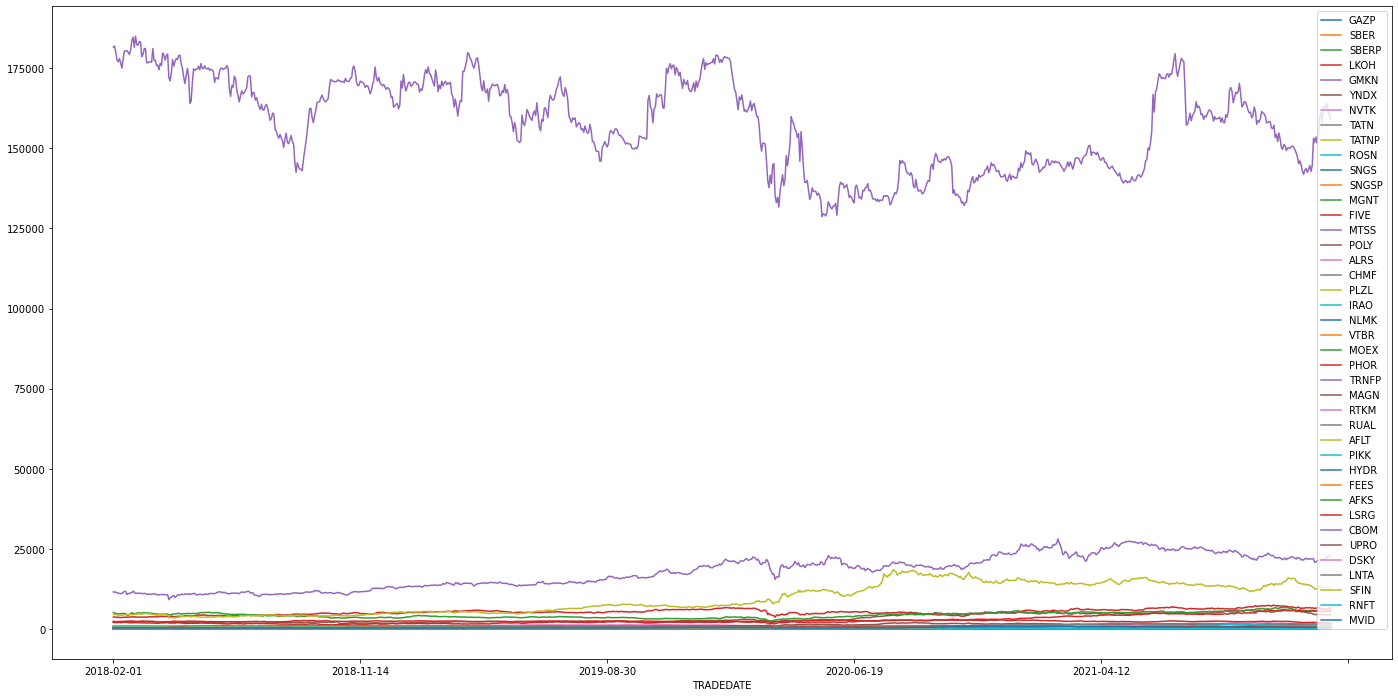

In [15]:
_, ax = plt.subplots(figsize=(24, 12))
df[assets].plot(ax=ax)

In [16]:
df[assets]

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,FEES,AFKS,LSRG,CBOM,UPRO,DSKY,LNTA,SFIN,RNFT,MVID
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2018-02-01,145.39,263.20,213.77,3760.5,11639.0,2202.0,732.0,578.65,410.0,344.95,...,0.17400,12.265,830.0,4.705,2.570,91.40,392.0,758.0,585.5,397.8
2018-02-02,144.00,257.32,208.80,3797.0,11496.0,2150.0,733.0,579.00,411.0,339.90,...,0.17550,12.000,829.0,4.687,2.555,92.35,384.0,762.0,603.5,418.7
2018-02-05,144.53,255.64,209.75,3752.0,11581.0,2150.0,728.0,564.40,408.4,338.30,...,0.17590,11.960,832.0,4.677,2.550,92.25,380.5,759.0,600.0,420.0
2018-02-06,141.59,258.94,210.60,3655.5,11308.0,2054.5,729.7,542.70,402.5,330.00,...,0.16790,11.460,819.0,4.601,2.532,92.00,381.0,760.0,609.0,422.3
2018-02-07,141.00,257.58,210.22,3735.0,11268.0,2140.5,736.4,563.10,405.0,336.00,...,0.16975,11.630,825.0,4.668,2.574,92.30,388.5,775.0,608.5,437.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,338.79,293.89,275.96,6313.5,21824.0,4424.8,1652.6,482.00,446.1,572.05,...,0.16596,22.325,578.2,6.556,2.568,124.54,190.4,528.0,150.0,451.1
2021-12-27,343.97,295.68,278.61,6397.5,22528.0,4467.8,1697.6,490.40,451.9,582.00,...,0.16596,22.556,583.6,6.657,2.585,124.76,189.5,522.6,151.6,450.0
2021-12-28,343.23,295.00,278.90,6478.0,22642.0,4482.0,1700.0,496.40,455.7,596.20,...,0.16380,23.600,593.6,6.831,2.580,124.20,187.7,527.2,151.6,435.5


# Log normalization

In [17]:
log_ret = np.log(df[assets] / df[assets].shift(1))
log_ret.head()

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,FEES,AFKS,LSRG,CBOM,UPRO,DSKY,LNTA,SFIN,RNFT,MVID
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-02,-0.009606,-0.022594,-0.023524,0.009659,-0.012362,-0.023898,0.001365,0.000605,0.002436,-0.014748,...,0.008584,-0.021843,-0.001206,-0.003833,-0.005854,0.010340,-0.020619,0.005263,0.030280,0.051205
2018-02-05,0.003674,-0.006550,0.004539,-0.011922,0.007367,0.000000,-0.006845,-0.025539,-0.006346,-0.004718,...,0.002277,-0.003339,0.003612,-0.002136,-0.001959,-0.001083,-0.009156,-0.003945,-0.005816,0.003100
2018-02-06,-0.020552,0.012826,0.004044,-0.026056,-0.023855,-0.045435,0.002332,-0.039207,-0.014552,-0.024840,...,-0.046547,-0.042705,-0.015748,-0.016383,-0.007084,-0.002714,0.001313,0.001317,0.014889,0.005461
2018-02-07,-0.004176,-0.005266,-0.001806,0.021515,-0.003544,0.041007,0.009140,0.036901,0.006192,0.018019,...,0.010958,0.014725,0.007299,0.014457,0.016452,0.003256,0.019494,0.019545,-0.000821,0.036275


In [18]:
log_ret

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,FEES,AFKS,LSRG,CBOM,UPRO,DSKY,LNTA,SFIN,RNFT,MVID
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-02,-0.009606,-0.022594,-0.023524,0.009659,-0.012362,-0.023898,0.001365,0.000605,0.002436,-0.014748,...,0.008584,-0.021843,-0.001206,-0.003833,-0.005854,0.010340,-0.020619,0.005263,0.030280,0.051205
2018-02-05,0.003674,-0.006550,0.004539,-0.011922,0.007367,0.000000,-0.006845,-0.025539,-0.006346,-0.004718,...,0.002277,-0.003339,0.003612,-0.002136,-0.001959,-0.001083,-0.009156,-0.003945,-0.005816,0.003100
2018-02-06,-0.020552,0.012826,0.004044,-0.026056,-0.023855,-0.045435,0.002332,-0.039207,-0.014552,-0.024840,...,-0.046547,-0.042705,-0.015748,-0.016383,-0.007084,-0.002714,0.001313,0.001317,0.014889,0.005461
2018-02-07,-0.004176,-0.005266,-0.001806,0.021515,-0.003544,0.041007,0.009140,0.036901,0.006192,0.018019,...,0.010958,0.014725,0.007299,0.014457,0.016452,0.003256,0.019494,0.019545,-0.000821,0.036275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,-0.003006,0.003716,-0.000217,0.001427,-0.002197,0.003214,-0.001934,-0.003934,0.001346,-0.012249,...,0.008350,-0.000672,-0.002418,-0.006537,-0.004662,0.003700,-0.026433,-0.000379,-0.002663,0.000887
2021-12-27,0.015174,0.006072,0.009557,0.013217,0.031749,0.009671,0.026866,0.017277,0.012918,0.017244,...,0.000000,0.010294,0.009296,0.015288,0.006598,0.001765,-0.004738,-0.010280,0.010610,-0.002441
2021-12-28,-0.002154,-0.002302,0.001040,0.012505,0.005048,0.003173,0.001413,0.012161,0.008374,0.024106,...,-0.013101,0.045246,0.016990,0.025802,-0.001936,-0.004499,-0.009544,0.008764,0.000000,-0.032753


<AxesSubplot:xlabel='TRADEDATE'>

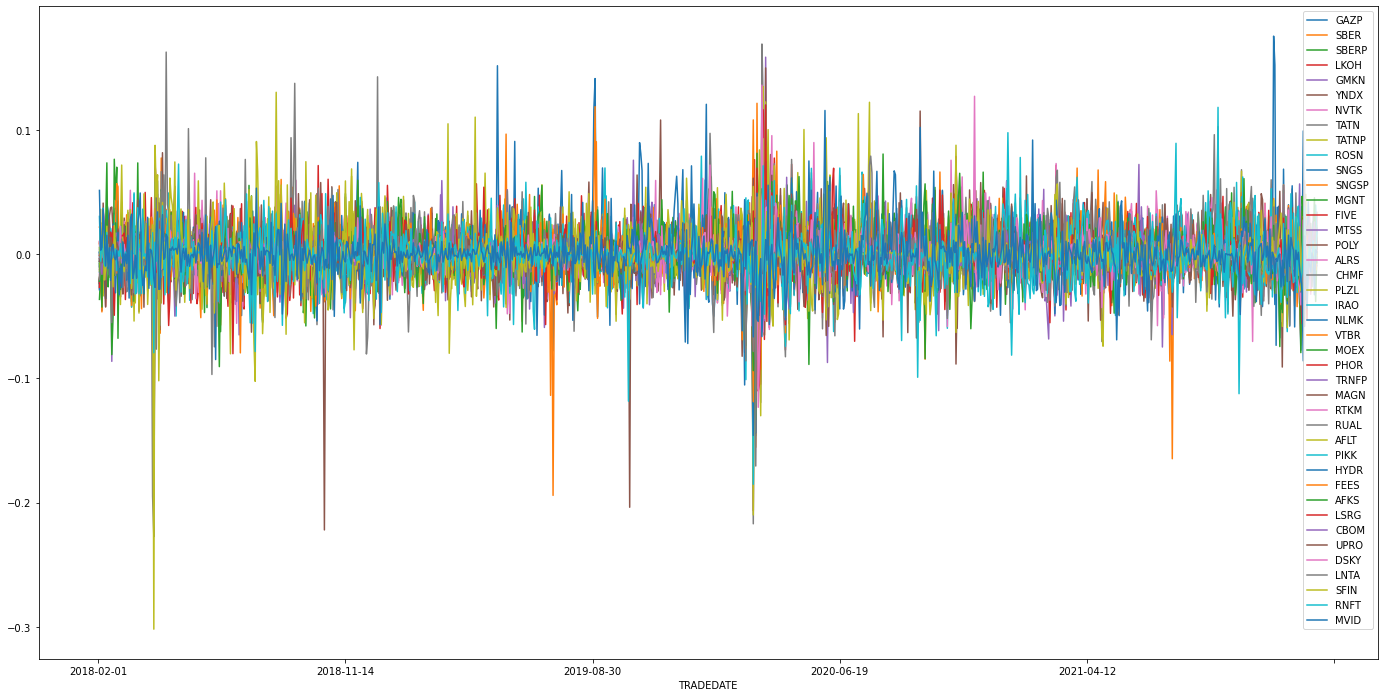

In [19]:
_, ax = plt.subplots(figsize=(24, 12))
log_ret[assets].plot(ax=ax)

In [20]:
log_ret.cov()

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,FEES,AFKS,LSRG,CBOM,UPRO,DSKY,LNTA,SFIN,RNFT,MVID
GAZP,0.000305,0.000175,0.000142,0.000176,0.000119,0.000081,1.450763e-04,0.000191,0.000158,0.000173,...,0.000106,0.000130,0.000074,0.000063,0.000054,0.000061,0.000067,0.000057,0.000066,1.395814e-05
SBER,0.000175,0.000382,0.000301,0.000187,0.000149,0.000134,1.706320e-04,0.000193,0.000171,0.000181,...,0.000138,0.000163,0.000115,0.000089,0.000070,0.000093,0.000099,0.000092,0.000079,3.241823e-05
SBERP,0.000142,0.000301,0.000272,0.000154,0.000126,0.000112,1.375310e-04,0.000161,0.000153,0.000153,...,0.000120,0.000137,0.000098,0.000074,0.000059,0.000081,0.000086,0.000080,0.000068,3.430423e-05
LKOH,0.000176,0.000187,0.000154,0.000376,0.000145,0.000101,1.907620e-04,0.000304,0.000252,0.000261,...,0.000140,0.000140,0.000111,0.000085,0.000067,0.000089,0.000093,0.000061,0.000082,3.593452e-05
GMKN,0.000119,0.000149,0.000126,0.000145,0.000352,0.000103,1.567694e-04,0.000165,0.000137,0.000145,...,0.000111,0.000114,0.000102,0.000061,0.000057,0.000076,0.000065,0.000075,0.000074,4.071166e-05
YNDX,0.000081,0.000134,0.000112,0.000101,0.000103,0.000468,9.739611e-05,0.000093,0.000076,0.000088,...,0.000084,0.000126,0.000077,0.000054,0.000047,0.000066,0.000079,0.000077,0.000056,5.126647e-05
NVTK,0.000145,0.000171,0.000138,0.000191,0.000157,0.000097,3.833096e-04,0.000217,0.000179,0.000179,...,0.000106,0.000140,0.000087,0.000065,0.000057,0.000081,0.000060,0.000046,0.000055,-8.971768e-07
TATN,0.000191,0.000193,0.000161,0.000304,0.000165,0.000093,2.169929e-04,0.000448,0.000368,0.000287,...,0.000160,0.000163,0.000126,0.000095,0.000073,0.000107,0.000093,0.000044,0.000078,2.256763e-05
TATNP,0.000158,0.000171,0.000153,0.000252,0.000137,0.000076,1.788349e-04,0.000368,0.000420,0.000243,...,0.000145,0.000149,0.000122,0.000088,0.000069,0.000099,0.000086,0.000038,0.000071,1.369780e-05
ROSN,0.000173,0.000181,0.000153,0.000261,0.000145,0.000088,1.788327e-04,0.000287,0.000243,0.000347,...,0.000137,0.000154,0.000104,0.000084,0.000073,0.000093,0.000099,0.000063,0.000072,3.671556e-05


In [21]:
df[assets].head()

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,FEES,AFKS,LSRG,CBOM,UPRO,DSKY,LNTA,SFIN,RNFT,MVID
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2018-02-01,145.39,263.20,213.77,3760.5,11639.0,2202.0,732.0,578.65,410.0,344.95,...,0.17400,12.265,830.0,4.705,2.570,91.40,392.0,758.0,585.5,397.8
2018-02-02,144.00,257.32,208.80,3797.0,11496.0,2150.0,733.0,579.00,411.0,339.90,...,0.17550,12.000,829.0,4.687,2.555,92.35,384.0,762.0,603.5,418.7
2018-02-05,144.53,255.64,209.75,3752.0,11581.0,2150.0,728.0,564.40,408.4,338.30,...,0.17590,11.960,832.0,4.677,2.550,92.25,380.5,759.0,600.0,420.0
2018-02-06,141.59,258.94,210.60,3655.5,11308.0,2054.5,729.7,542.70,402.5,330.00,...,0.16790,11.460,819.0,4.601,2.532,92.00,381.0,760.0,609.0,422.3
2018-02-07,141.00,257.58,210.22,3735.0,11268.0,2140.5,736.4,563.10,405.0,336.00,...,0.16975,11.630,825.0,4.668,2.574,92.30,388.5,775.0,608.5,437.9


In [22]:
df[assets].shift(1)

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,FEES,AFKS,LSRG,CBOM,UPRO,DSKY,LNTA,SFIN,RNFT,MVID
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-02,145.39,263.20,213.77,3760.5,11639.0,2202.0,732.0,578.65,410.0,344.95,...,0.17400,12.265,830.0,4.705,2.570,91.40,392.0,758.0,585.5,397.8
2018-02-05,144.00,257.32,208.80,3797.0,11496.0,2150.0,733.0,579.00,411.0,339.90,...,0.17550,12.000,829.0,4.687,2.555,92.35,384.0,762.0,603.5,418.7
2018-02-06,144.53,255.64,209.75,3752.0,11581.0,2150.0,728.0,564.40,408.4,338.30,...,0.17590,11.960,832.0,4.677,2.550,92.25,380.5,759.0,600.0,420.0
2018-02-07,141.59,258.94,210.60,3655.5,11308.0,2054.5,729.7,542.70,402.5,330.00,...,0.16790,11.460,819.0,4.601,2.532,92.00,381.0,760.0,609.0,422.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,339.81,292.80,276.02,6304.5,21872.0,4410.6,1655.8,483.90,445.5,579.10,...,0.16458,22.340,579.6,6.599,2.580,124.08,195.5,528.2,150.4,450.7
2021-12-27,338.79,293.89,275.96,6313.5,21824.0,4424.8,1652.6,482.00,446.1,572.05,...,0.16596,22.325,578.2,6.556,2.568,124.54,190.4,528.0,150.0,451.1
2021-12-28,343.97,295.68,278.61,6397.5,22528.0,4467.8,1697.6,490.40,451.9,582.00,...,0.16596,22.556,583.6,6.657,2.585,124.76,189.5,522.6,151.6,450.0


# Monte Carlo

## init arrays

In [23]:
num_iterations = 30000

In [24]:
weights_array = np.zeros((num_iterations, len(assets)))
return_array = np.zeros(num_iterations)
variance_array = np.zeros(num_iterations)
sharpe_arr = np.zeros(num_iterations)

## repeat num_iterations times

In [25]:
for i in range(num_iterations):
    local_weights = np.array(np.random.random(len(assets)))
    local_weights = local_weights / np.sum(local_weights)

    weights_array[i, :] = local_weights
    return_array[i] = np.sum((log_ret.mean() * local_weights) * 252)
    variance_array[i] = np.sqrt(np.dot(local_weights.T, np.dot(log_ret.cov() * 252, local_weights)))
    sharpe_arr[i] = return_array[i] / variance_array[i]

## show max ratio

In [26]:
sharpe_arr.max()

0.7286066707284428

In [27]:
optimal_weights = weights_array[sharpe_arr.argmax(), :]
max_return = return_array[sharpe_arr.argmax()]
max_variance = variance_array[sharpe_arr.argmax()]
f"Max return {round(max_return * 100, 2)}, Max_variance: {round(max_variance * 100, 2)}"

'Max return 10.46, Max_variance: 14.35'

## draw graph

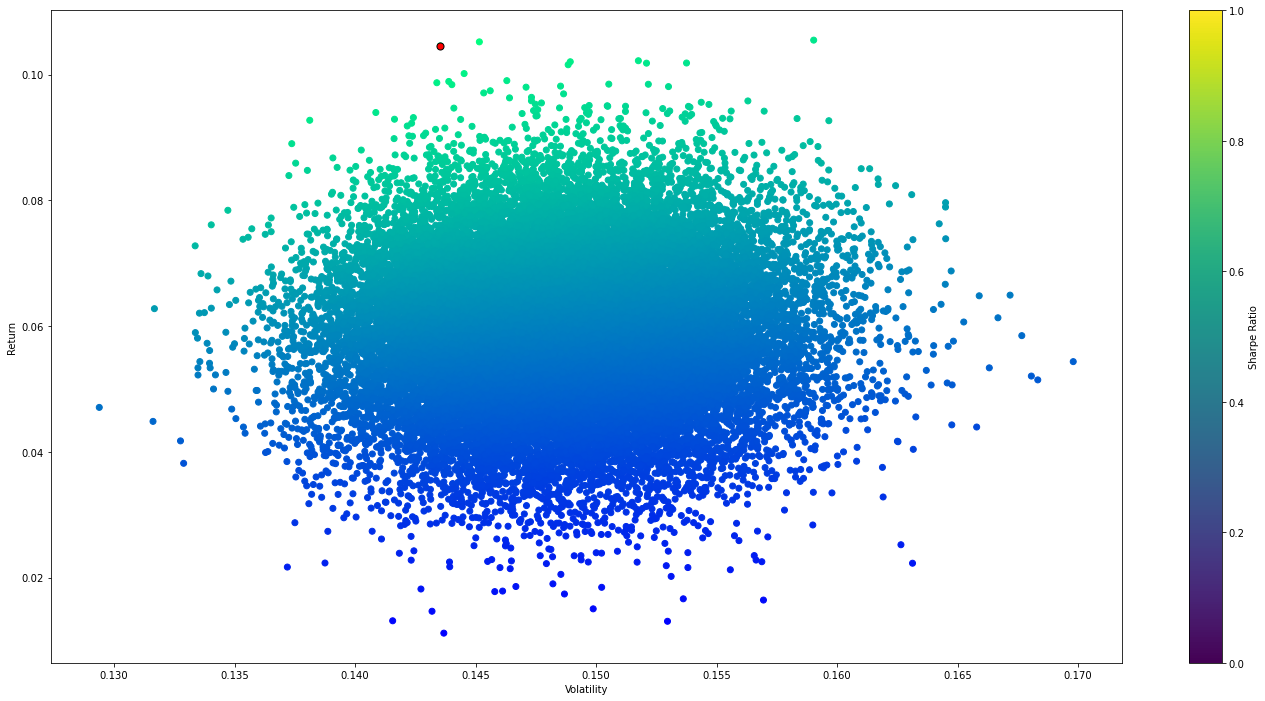

In [28]:
plt.figure(figsize=(24,12))
plt.scatter(variance_array, return_array, c=sharpe_arr, cmap='winter')
plt.scatter(max_variance,max_return, c='red', s=50, edgecolors='black')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
None

## show result as table

In [29]:
pd.DataFrame({
    "position": [round(weight * budget, 2) for weight in optimal_weights],
    "percent": [round(weight * 100, 2) for weight in optimal_weights]
}, index=assets).sort_values('percent', ascending=False)

,position,percent
POLY,15446.97,5.15
PIKK,15364.23,5.12
RUAL,15046.98,5.02
FEES,15006.12,5.00
SNGSP,14937.50,4.98
CBOM,14886.29,4.96
PHOR,14765.87,4.92
AFKS,14059.48,4.69
ROSN,12934.25,4.31
MAGN,12687.68,4.23


In [36]:
ptc_assets = {'GAZP': 'ПАО  "Газпром"',
 'SBER': 'ПАО Сбербанк',
 'SBERP': 'ПАО Сбербанк',
 'LKOH': 'ПАО "ЛУКОЙЛ"',
 'GMKN': 'ПАО "ГМК "Норильский никель"',
 'YNDX': 'Яндекс Н.В.',
 'NVTK': 'ПАО "НОВАТЭК"',
 'TATN': 'ПАО "Татнефть" им. В.Д. Шашина',
 'TATNP': 'ПАО "Татнефть" им. В.Д. Шашина',
 'ROSN': 'ПАО "НК "Роснефть"',
 'SNGS': 'ПАО "Сургутнефтегаз"',
 'SNGSP': 'ПАО "Сургутнефтегаз"',
 'MGNT': 'ПАО "Магнит"',
 'FIVE': 'Икс 5 Ритейл Груп Н.В.и',
 'MTSS': 'ПАО "МТС"',
 'POLY': 'Полиметалл Интернэшнл плс',
 'ALRS': 'АК "АЛРОСА" (ПАО)',
 'CHMF': 'ПАО "Северсталь"',
 'PLZL': 'ПАО "Полюс"',
 'IRAO': 'ПАО "Интер РАО"',
 'NLMK': 'ПАО "НЛМК"',
 'VTBR': 'Банк ВТБ (ПАО)',
 'MOEX': 'ПАО Московская Биржа',
 'PHOR': 'ПАО "ФосАгро"',
 'TRNFP': 'ПАО "Транснефть"',
 'MAGN': 'ПАО "ММК"',
 'RTKM': 'ПАО "Ростелеком"',
 'RUAL': 'Юнайтед Компани РУСАЛ Плс',
 'AFLT': 'ПАО "Аэрофлот"',
 'PIKK': 'ПАО "Группа Компаний ПИК"',
 'HYDR': 'ПАО "РусГидро"',
 'FEES': 'ПАО "ФСК ЕЭС"',
 'AFKS': 'ПАО АФК "Система"',
 'LSRG': 'ПАО "Группа ЛСР"',
 'CBOM': 'ПАО "МОСКОВСКИЙ КРЕДИТНЫЙ БАНК"',
 'UPRO': 'ПАО "Юнипро"',
 'DSKY': 'ПАО "Детский мир"',
 'LNTA': 'Лента Лтд.',
 'SFIN': 'ПАО "САФМАР Финансовые инвестиции"',
 'RNFT': 'ПАО НК "РуссНефть"',
 'MVID': 'ПАО "М.видео"'}

In [39]:
sorted_result = pd.DataFrame({
    #"position": [round(weight * budget, 2) for weight in optimal_weights],
    "Название": [ptc_assets[asset] for asset in assets],
    "Код": assets,
    "Вес": [round(weight, 2) for weight in optimal_weights]
}).sort_values('Вес', ascending=False)
sorted_result.to_csv("data/portfolio_2.csv")
sorted_result

,Название,Код,Вес
11,"ПАО ""Сургутнефтегаз""",SNGSP,0.05
34,"ПАО ""МОСКОВСКИЙ КРЕДИТНЫЙ БАНК""",CBOM,0.05
27,Юнайтед Компани РУСАЛ Плс,RUAL,0.05
15,Полиметалл Интернэшнл плс,POLY,0.05
29,"ПАО ""Группа Компаний ПИК""",PIKK,0.05
31,"ПАО ""ФСК ЕЭС""",FEES,0.05
32,"ПАО АФК ""Система""",AFKS,0.05
23,"ПАО ""ФосАгро""",PHOR,0.05
25,"ПАО ""ММК""",MAGN,0.04
26,"ПАО ""Ростелеком""",RTKM,0.04


In [31]:
np.sum(optimal_weights)

1.0